# Introduction

- A/B Testing means analyzing two marketing strategies to choose the best marketing strategy that can convert more traffic into sales (or more traffic into your desired goal) effectively and efficiently. A/B testing is one of the valuable concepts that every Data Science professional should know.

# A/B Testing

- In A/B testing, we analyze the results of two marketing strategies to choose the best one for future marketing campaigns. For example, when I started an ad campaign on Instagram to promote my Instagram post for the very first time, my target audience was different from the target audience of my second ad campaign. After analyzing the results of both ad campaigns, I always preferred the audience of the second ad campaign as it gave better reach and followers than the first one.

- That is what A/B testing means. Your goal can be to boost sales, followers, or traffic, but when we choose the best marketing strategy according to the results of our previous marketing campaigns, it is nothing but A/B testing.

- For the task of A/B testing using Python, we need to have a dataset about two different marketing strategies for the same goal. 

# Import Libraries and Datasets

In [182]:
import pandas as pd
import numpy as np
import datetime
from scipy import stats

from datetime import date, timedelta

import seaborn as sns

    
import matplotlib.pyplot as plt

In [138]:
control_data = pd.read_csv("control_group.csv", sep = ";")
test_data = pd.read_csv("test_group.csv", sep = ";")

In [139]:
control_data['Date'] = pd.to_datetime(control_data['Date'], format='%d.%m.%Y')
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%d.%m.%Y')

In [140]:
control_data.columns = ["Campaign", "Date", "Spent(USD)", 
                        "Impressions", "Reach", "Clicks", 
                        "Searches", "Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign", "Date", "Spent(USD)", 
                        "Impressions", "Reach", "Clicks", 
                        "Searches", "Viewed", "Added to Cart",
                        "Purchases"]

In [141]:
print(control_data.isnull().sum())

Campaign         0
Date             0
Spent(USD)       0
Impressions      1
Reach            1
Clicks           1
Searches         1
Viewed           1
Added to Cart    1
Purchases        1
dtype: int64


In [6]:
print(test_data.isnull().sum())

Campaign         0
Date             0
Spent(USD)       0
Impressions      0
Reach            0
Clicks           0
Searches         0
Viewed           0
Added to Cart    0
Purchases        0
dtype: int64


# Missing Values

- The dataset of the control campaign has missing values in a row. Let’s fill in these missing values by the mean value of each column:

In [142]:
control_data["Impressions"].fillna(value=round(control_data["Impressions"].mean()), inplace=True)
control_data["Reach"].fillna(value=round(control_data["Reach"].mean()), inplace=True)
control_data["Clicks"].fillna(value=round(control_data["Clicks"].mean()), inplace=True)
control_data["Searches"].fillna(value=round(control_data["Searches"].mean()), inplace=True)
control_data["Viewed"].fillna(value=round(control_data["Viewed"].mean()), inplace=True)
control_data["Added to Cart"].fillna(value=round(control_data["Added to Cart"].mean()), inplace=True)
control_data["Purchases"].fillna(value=round(control_data["Purchases"].mean()), inplace=True)

control_data = control_data.astype({
    "Impressions":"int",
    "Reach":"int",
    "Clicks":"int",
    "Searches":"int",
    "Viewed":"int",
    "Added to Cart":"int",
    "Purchases":"int"
})

#control_data["Impressions"] = control_data["Impressions"].astype(int)
#control_data["Reach"] = control_data["Reach"].astype(int)
#control_data["Clicks"] = control_data["Clicks"].astype(int)
#control_data["Searches"] = control_data["Searches"].astype(int)
#control_data["Viewed"] = control_data["Viewed"].astype(int)
#control_data["Added to Cart"] = control_data["Added to Cart"].astype(int)
#control_data["Purchases"] = control_data["Purchases"].astype(int)

In [143]:
control_data.dtypes

Campaign                 object
Date             datetime64[ns]
Spent(USD)                int64
Impressions               int64
Reach                     int64
Clicks                    int64
Searches                  int64
Viewed                    int64
Added to Cart             int64
Purchases                 int64
dtype: object

In [150]:
control_data

,Campaign,Date,Spent(USD),Impressions,Reach,Clicks,Searches,Viewed,Added to Cart,Purchases
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,2019-08-04,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,2019-08-05,1835,109560,88845,5321,2221,1944,1300,523
5,Control Campaign,2019-08-06,3083,109076,87998,4028,1709,1249,784,764
6,Control Campaign,2019-08-07,2544,142123,127852,2640,1388,1106,1166,499
7,Control Campaign,2019-08-08,1900,90939,65217,7260,3047,2746,930,462
8,Control Campaign,2019-08-09,2813,121332,94896,6198,2487,2179,645,501
9,Control Campaign,2019-08-10,2149,117624,91257,2277,2475,1984,1629,734


In [145]:
test_data.dtypes

Campaign                 object
Date             datetime64[ns]
Spent(USD)                int64
Impressions               int64
Reach                     int64
Clicks                    int64
Searches                  int64
Viewed                    int64
Added to Cart             int64
Purchases                 int64
dtype: object

# Metric Comparisons

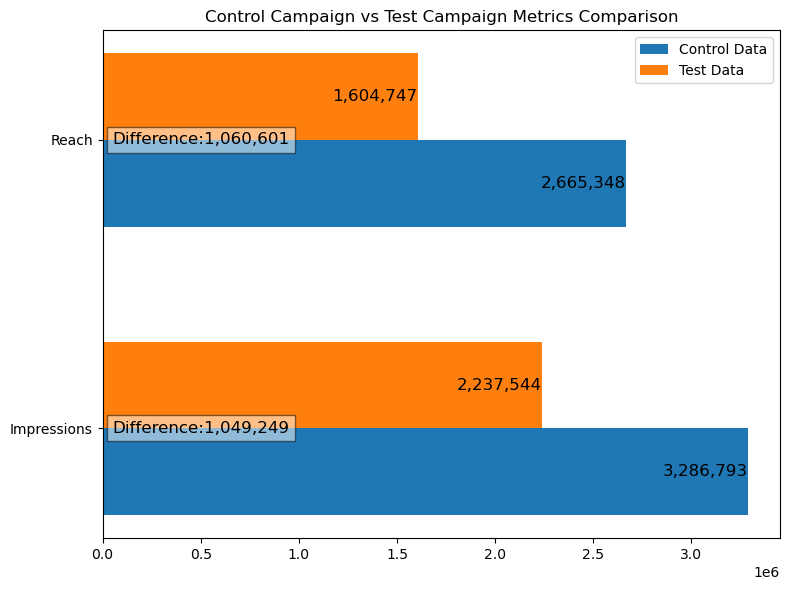

In [209]:
#data
total_control_impressions = control_data["Impressions"].sum()
total_test_impressions = test_data["Impressions"].sum()


total_control_reach = control_data["Reach"].sum()
total_test_reach = test_data["Reach"].sum()

#x-axis
metrics = ["Impressions", "Reach"]
#y-axis
control = [total_control_impressions, total_control_reach]
test = [total_test_impressions, total_test_reach]
 
#bar chart properties
x = np.arange(len(metrics))
width = 0.3
#draw grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.barh(x - width/2, control, width, label='Control Data')
bar2 = ax.barh(x + width/2, test, width, label='Test Data')
 
#ax.set_xlabel('Year')
#ax.set_ylabel('Metrics')
ax.set_title('Control Campaign vs Test Campaign Metrics Comparison')
ax.set_yticks(x, metrics)
ax.legend()


for i, (p, pr) in enumerate(zip(control, test)):
    plt.text(s="{:,}".format(p), x=p, y=i-0.15, color="k", verticalalignment="center",horizontalalignment="right", size=12)
    plt.text(s="{:,}".format(pr), x=pr, y=i+0.15, color="k",verticalalignment="center", horizontalalignment="right", size=12)
    plt.text(s= "Difference:"+ "{:,}".format(p-pr), x=50000, y=i, color="k",verticalalignment="center", horizontalalignment="left", size=12, bbox=dict(facecolor='white', alpha=0.5))

fig.tight_layout()

plt.show()

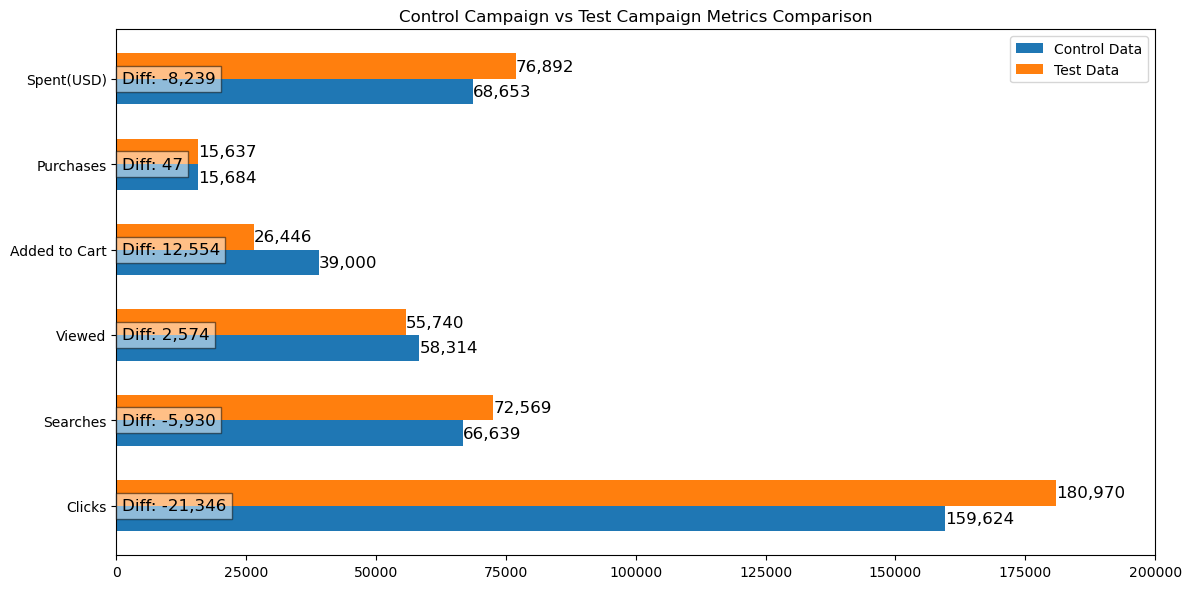

In [208]:
#data
total_control_spending = control_data["Spent(USD)"].sum()
total_test_spending = test_data["Spent(USD)"].sum()

total_control_clicks = control_data["Clicks"].sum()
total_test_clicks = test_data["Clicks"].sum()

total_control_searches = control_data["Searches"].sum()
total_test_searches = test_data["Searches"].sum()

total_control_viewed = control_data["Viewed"].sum()
total_test_viewed = test_data["Viewed"].sum()

total_control_add_to_cart = control_data["Added to Cart"].sum()
total_test_add_to_cart = test_data["Added to Cart"].sum()

total_control_purchases = control_data["Purchases"].sum()
total_test_purchases = test_data["Purchases"].sum()

#x-axis
metrics = ["Clicks", "Searches", "Viewed", "Added to Cart", "Purchases", "Spent(USD)"]
#y-axis
control = [
    total_control_clicks,
    total_control_searches,
    total_control_viewed,
    total_control_add_to_cart,
    total_control_purchases,
    total_control_spending
]

test = [
    total_test_clicks,
    total_test_searches,
    total_test_viewed,
    total_test_add_to_cart,
    total_test_purchases,
    total_test_spending
]

#bar chart properties
x = np.arange(len(metrics))
width = 0.3
#draw grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.barh(x - width/2, control, width, label='Control Data')
bar2 = ax.barh(x + width/2, test, width, label='Test Data')
 
#ax.set_ylabel('Metrics')
ax.set_title('Control Campaign vs Test Campaign Metrics Comparison')
ax.set_yticks(x, metrics)
ax.legend()


for i, (p, pr) in enumerate(zip(control, test)):
    plt.text(s="{:,}".format(p), x=p, y=i-0.15, color="k", verticalalignment="center",horizontalalignment="left", size=12)
    plt.text(s="{:,}".format(pr), x=pr, y=i+0.15, color="k",verticalalignment="center", horizontalalignment="left", size=12)
    plt.text(s= "Diff: "+ "{:,}".format(p-pr), x=1000, y=i, color="k",verticalalignment="center", horizontalalignment="left", size=12, bbox=dict(facecolor='white', alpha=0.5))

fig.tight_layout()
plt.xlim(0,200000)
plt.show()

The first campaign seems to be more effective at driving users to click on the content, which could indicate that the content is engaging or that the call-to-action is compelling.

The second campaign appears to have a wider reach (more unique users saw the content), generated more impressions (the content was displayed more times), and led to more add to cart actions. This could suggest that while the second campaign might not have prompted as many immediate clicks, it was successful in reaching a larger audience and moving users further along the conversion funnel (as indicated by the add to cart actions).

In [188]:
df

,control,test
Spent(USD),68653,76892
Impressions,3286793,2237544
Reach,2665348,1604747
Clicks,159624,180970
Searches,66639,72569
Viewed,58314,55740
Added to Cart,39000,26446
Purchases,15684,15637


# Count Relevant Metrics

In [9]:
# Function to calculate Conversion Rate
def calculate_conversion_rate(data):
    total_purchases = data['Purchases'].sum()
    total_impressions = data['Impressions'].sum()
    conversion_rate = (total_purchases / total_impressions) * 100
    return conversion_rate

# Function to calculate Click-Through Rate (CTR)
def calculate_ctr(data):
    total_clicks = data['Clicks'].sum()
    total_impressions = data['Impressions'].sum()
    ctr = (total_clicks / total_impressions) * 100
    return ctr

# Function to calculate Cost per Conversion
def calculate_cost_per_conversion(data):
    total_spend = data['Spent(USD)'].sum()
    total_purchases = data['Purchases'].sum()
    cost_per_conversion = total_spend / total_purchases
    return cost_per_conversion


# Calculate metrics for Control and Test groups
conversion_rate_control = calculate_conversion_rate(control_data)
conversion_rate_test = calculate_conversion_rate(test_data)

ctr_control = calculate_ctr(control_data)
ctr_test = calculate_ctr(test_data)

cost_per_conversion_control = calculate_cost_per_conversion(control_data)
cost_per_conversion_test = calculate_cost_per_conversion(test_data)

# Print the calculated metrics
print("Conversion Rate (Control): {:.2f}%".format(conversion_rate_control))
print("Conversion Rate (Test): {:.2f}%".format(conversion_rate_test))
print("CTR (Control): {:.2f}%".format(ctr_control))
print("CTR (Test): {:.2f}%".format(ctr_test))
print("Cost per Conversion (Control): ${:.2f}".format(cost_per_conversion_control))
print("Cost per Conversion (Test): ${:.2f}".format(cost_per_conversion_test))

Conversion Rate (Control): 0.48%
Conversion Rate (Test): 0.70%
CTR (Control): 4.86%
CTR (Test): 8.09%
Cost per Conversion (Control): $4.38
Cost per Conversion (Test): $4.92


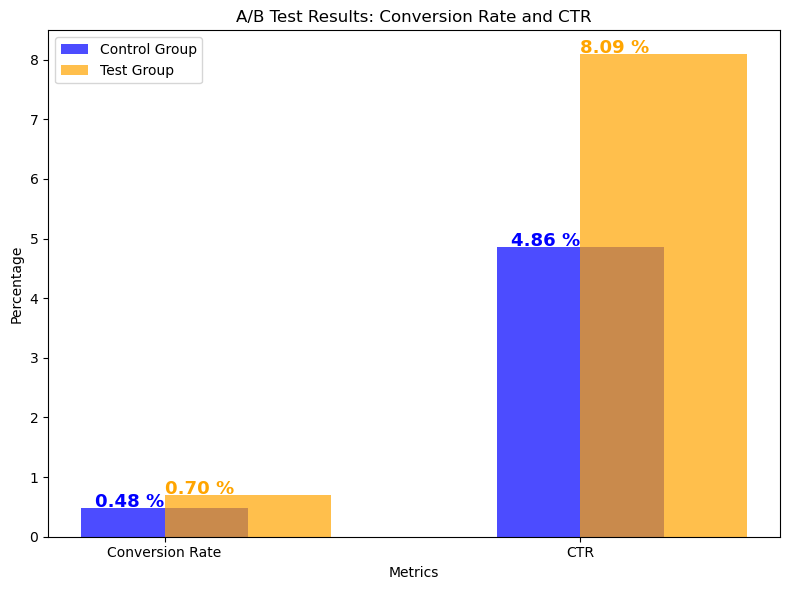

In [10]:
# Data
metrics = ['Conversion Rate', 'CTR']
control_values = [conversion_rate_control, ctr_control]
test_values = [conversion_rate_test, ctr_test]

# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, control_values, width=0.4, label='Control Group', align='center', color='b', alpha=0.7)
plt.bar(metrics, test_values, width=0.4, label='Test Group', align='edge', color='orange', alpha=0.7)

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('A/B Test Results: Conversion Rate and CTR')
plt.legend()

# Add labels to bar
for i, v in enumerate(control_values):
    plt.text(i, v+0.02, "%.2f" % v + " %", color='blue', fontweight='bold', horizontalalignment="right", size = 13)
    
for i, v in enumerate(test_values):
    plt.text(i, v+0.02, "%.2f" % v + " %", color='orange', fontweight='bold', horizontalalignment="left", size = 13)

    
    
# Show the plot
plt.tight_layout()
plt.show()


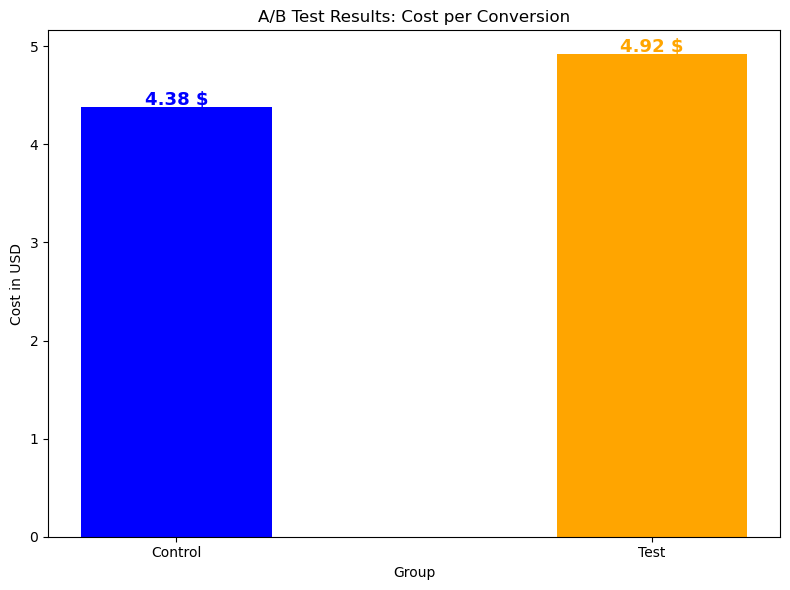

In [11]:
# Data
metrics = ['Control', 'Test']
plt.figure(figsize=(8, 6))
plt.bar(metrics[0], cost_per_conversion_control, width=0.4, align='center', color='blue')
plt.bar(metrics[1], cost_per_conversion_test, width=0.4, align='center', color='orange')

plt.text(0, cost_per_conversion_control+0.02, "%.2f" % cost_per_conversion_control + " $", fontweight='bold', horizontalalignment="center", color='blue', size = 13)
plt.text(1, cost_per_conversion_test+0.02, "%.2f" % cost_per_conversion_test + " $", fontweight='bold', horizontalalignment="center", color='orange', size = 13)
    

plt.xlabel('Group')
plt.ylabel('Cost in USD')
plt.title('A/B Test Results: Cost per Conversion')
plt.tight_layout()
plt.show()


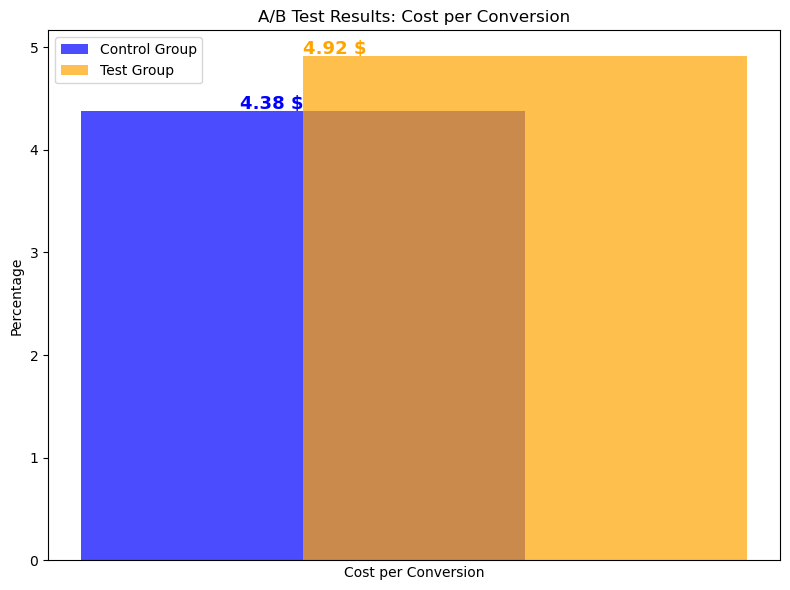

In [12]:
# Data
metrics = ['Cost per Conversion']
control_values = [conversion_rate_control, ctr_control]
test_values = [conversion_rate_test, ctr_test]

# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, cost_per_conversion_control, width=0.2, label='Control Group', align='center', color='b', alpha=0.7)
plt.bar(metrics, cost_per_conversion_test, width=0.2, label='Test Group', align='edge', color='orange', alpha=0.7)

# Add labels and title
plt.xticks([])   

plt.xlabel('Cost per Conversion')
plt.ylabel('Percentage')
plt.title('A/B Test Results: Cost per Conversion')
plt.legend()

# Add labels to bar

plt.text(0, cost_per_conversion_control+0.02, "%.2f" % cost_per_conversion_control + " $", fontweight='bold', horizontalalignment="right", color='blue', size = 13)
plt.text(0, cost_per_conversion_test+0.02, "%.2f" % cost_per_conversion_test + " $", fontweight='bold', horizontalalignment="left", color='orange', size = 13)
  
    
# Show the plot
plt.tight_layout()
plt.show()


# Statistical Test

In [13]:

# Perform t-tests for Conversion Rate and CTR
def perform_t_test(data1, data2):
    t_stat, p_value = stats.ttest_ind(data1, data2)
    return t_stat, p_value

# Perform t-tests for Conversion Rate and CTR
t_stat_conversion, p_value_conversion = perform_t_test(control_data['Purchases'], test_data['Purchases'])
t_stat_ctr, p_value_ctr = perform_t_test(control_data['Clicks'], test_data['Clicks'])

# Set the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value_conversion < alpha:
    print("Statistically significant difference in Conversion Rate.")
    if conversion_rate_test > conversion_rate_control:
        print("Test group performs better.")
    else:
        print("Control group performs better.")
else:
    print("No statistically significant difference in Conversion Rate.")

if p_value_ctr < alpha:
    print("Statistically significant difference in CTR.")
    if ctr_test > ctr_control:
        print("Test group performs better.")
    else:
        print("Control group performs better.")
else:
    print("No statistically significant difference in CTR.")

No statistically significant difference in Conversion Rate.
No statistically significant difference in CTR.


While the statistical tests didn't reveal significant differences, it's essential to consider the practical implications and the context of your project. Sometimes, even if differences are not statistically significant, they could still be practically meaningful. Continue to monitor these metrics and consider other factors that may influence your marketing decisions.

# Scoring

In [18]:
purchases = control_data["Purchases"]
test_purchases = test_data["Purchases"]

reach = control_data["Reach"]
test_reach = test_data["Reach"]

clicks = control_data["Clicks"]
test_clicks = test_data["Clicks"]

searches = control_data["Searches"]
test_searches = test_data["Searches"]


add_to_cart = control_data["Added to Cart"]
test_add_to_cart = test_data["Added to Cart"]


spending = control_data["Spent(USD)"]
test_spending = test_data["Spent(USD)"]

date = control_data["Date"]
test_date = test_data["Date"]

In [19]:
control_data["Score"] = ((control_data["Purchases"] * ((control_data["Purchases"] / control_data["Reach"])+(0.5*((control_data["Clicks"] + control_data["Searches"] + control_data["Added to Cart"])/control_data["Reach"]))))/control_data["Spent(USD)"])*100
#score = ((purchases * (purchases / reach))/spending)*100
#score = (purchases * (purchases / reach))

test_score = ((test_purchases * ((test_purchases / test_reach)+ (0.5*((test_clicks + test_searches + test_add_to_cart)/test_reach) ) ))/test_spending)*100
test_data["Score"] = ((test_data["Purchases"] * ((test_data["Purchases"] / test_data["Reach"])+(0.5*((test_data["Clicks"] + test_data["Searches"] + test_data["Added to Cart"])/test_data["Reach"]))))/test_data["Spent(USD)"])*100

#test_score = ((test_purchases * (test_purchases / test_reach))/test_spending)*100
#test_score = (test_purchases * (test_purchases / test_reach))

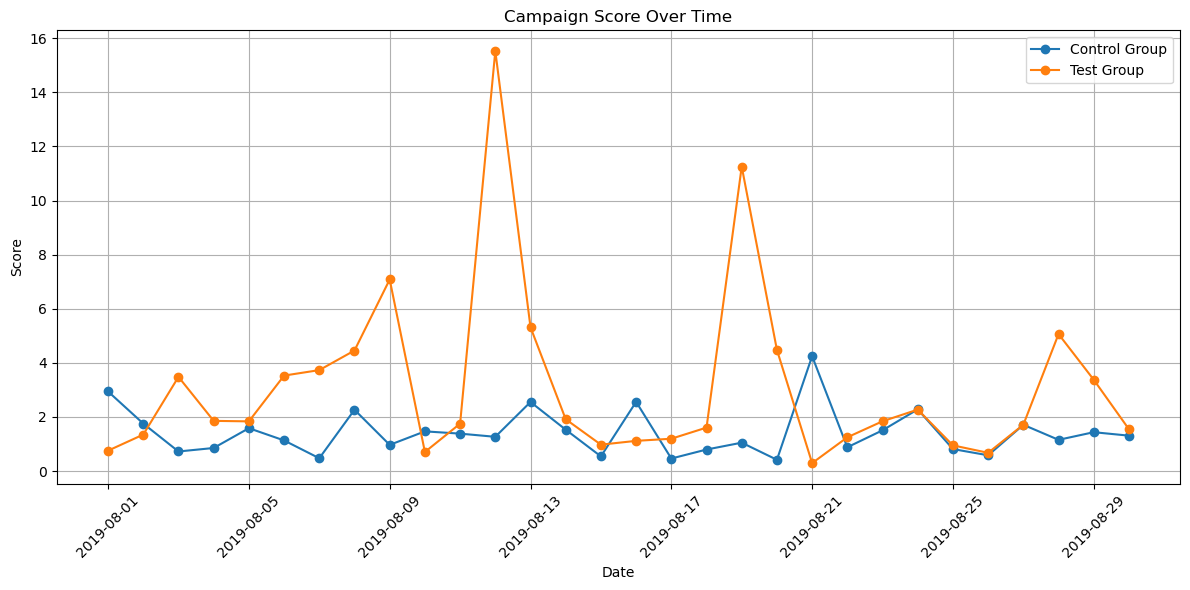

In [20]:
# Create a time-series line plot for Conversion Rate
plt.figure(figsize=(12, 6))
plt.plot(control_data["Date"], control_data["Score"], label='Control Group', marker='o', linestyle='-')
plt.plot(test_data["Date"],  test_data["Score"], label='Test Group', marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Campaign Score Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

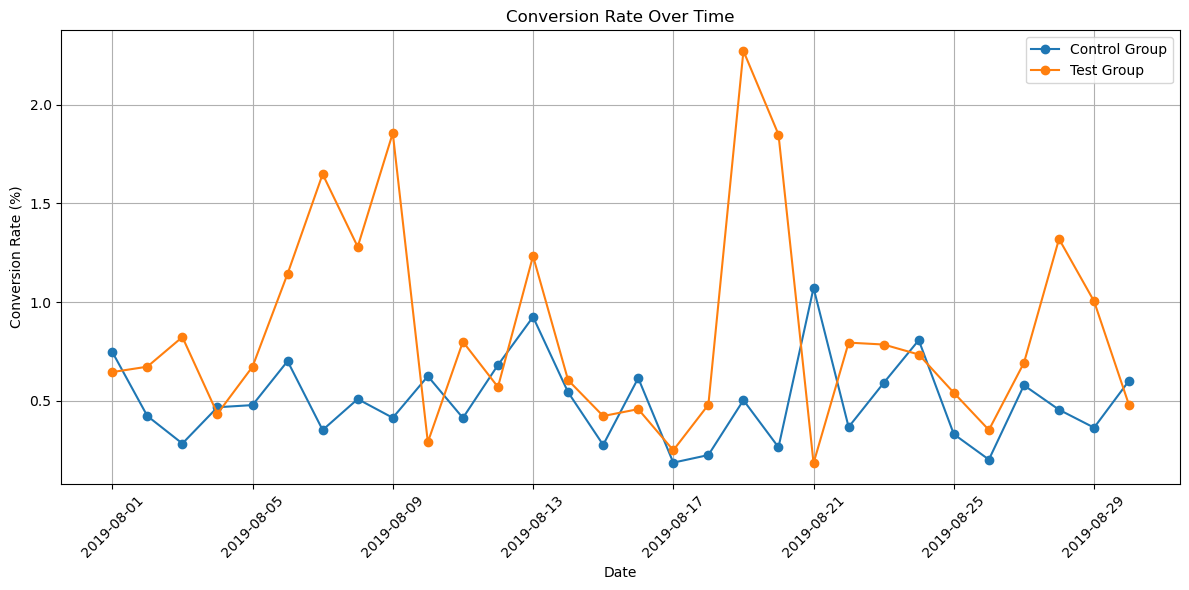

In [21]:
# Create a time-series line plot for Conversion Rate
plt.figure(figsize=(12, 6))
plt.plot(control_data['Date'], control_data['Purchases'] / control_data['Impressions'] * 100, label='Control Group', marker='o', linestyle='-')
plt.plot(test_data['Date'], test_data['Purchases'] / test_data['Impressions'] * 100, label='Test Group', marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()